# 🛳️ Exploratory Data Analysis (EDA) - Titanic Project (Kaggle)

## 📌 Objective

The purpose of this notebook is to perform an Exploratory Data Analysis (EDA) on the famous **Titanic - Machine Learning from Disaster** dataset, available on Kaggle. The goal is to understand the structure of the data, identify patterns, handle missing values, explore correlations, and uncover key features that may contribute to predicting passenger survival.

## 📁 About the Dataset

The dataset contains information about passengers aboard the Titanic, including:

- `PassengerId`: Unique ID for each passenger  
- `Survived`: Survival status (0 = No, 1 = Yes)  
- `Pclass`: Ticket class (1st, 2nd, 3rd)  
- `Name`, `Sex`, `Age`: Name, gender, and age  
- `SibSp`, `Parch`: Number of siblings/spouses and parents/children aboard  
- `Ticket`, `Fare`: Ticket number and fare paid  
- `Cabin`, `Embarked`: Cabin number and port of embarkation  

## 🧭 Analysis Roadmap

1. **Importing libraries**
2. **Loading and inspecting the data**
3. **Handling missing values**
4. **Univariate analysis (individual features)**
5. **Bivariate analysis (feature relationships)**
6. **Group comparisons (e.g., survivors vs non-survivors)**
7. **Key insights for modeling**

## 📦 Libraries Used

- `pandas`, `numpy` – Data manipulation  
- `matplotlib`, `seaborn` – Data visualization  
- `plotly` *(optional)* – Interactive visualizations  
- `sklearn` – Preprocessing (for later modeling phases)

---


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Drop columns
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Fill missing values

In [5]:
# check what is missing
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [153]:
age_mean = round(df['Age'].mean())
fare_mean = df['Fare'].mean()
age_mean

30

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

'S'

In [9]:
df['Age'].fillna(age_mean, inplace=True)
df['Embarked'].fillna(embarked_mode, inplace=True)

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# EDA - Exploratory Data Analysis

## ❓ Key Questions to Explore

During the exploratory data analysis (EDA), we aim to answer the following questions using the Titanic dataset:

1. **Who were more likely to survive?**
   - What is the survival rate by gender?
   - What is the survival rate by passenger class (`Pclass`)?

2. **How does age affect survival?**
   - Did children have a higher chance of survival?
   - What is the distribution of age among survivors vs non-survivors?
   - Are there specific age groups with higher survival rates?

3. **Did family relationships impact survival?**
   - Is there a relationship between the number of siblings/spouses (`SibSp`) and survival?
   - Is there a relationship between the number of parents/children (`Parch`) and survival?
   - Were people traveling alone less likely to survive?

4. **Did the port of embarkation (`Embarked`) make a difference?**
   - Which embarkation port had the highest survival rate?
   - Is there a correlation between embarkation port and passenger class?

### Answers

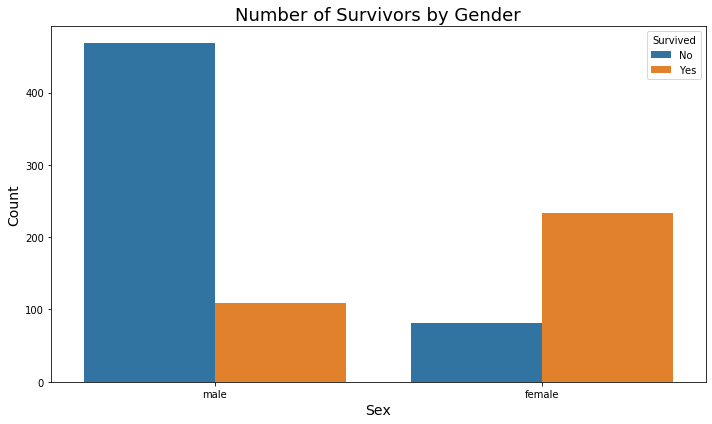

In [11]:
# What is the survival rate by gender?
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Number of Survivors by Gender", fontsize=18)
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

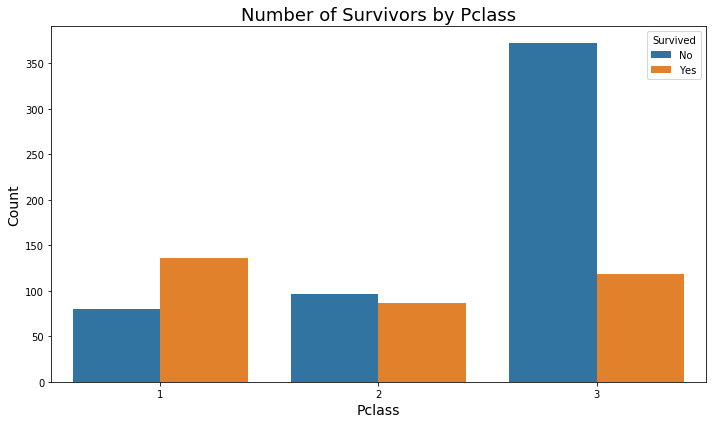

In [12]:
# What is the survival rate by passenger class (Pclass)?
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Number of Survivors by Pclass", fontsize=18)
plt.xlabel("Pclass", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

In [13]:
df[df['Age'] % 1 != 0][:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
57,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,7.2292,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,S
111,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
116,0,3,"Connors, Mr. Patrick",male,70.50,0,0,7.7500,Q
122,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,30.0708,C
123,1,2,"Webber, Miss. Susan",female,32.50,0,0,13.0000,S
148,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,26.0000,S
152,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,8.0500,S
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,14.5000,S
203,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,7.2250,C


In [14]:
df['Age'] = round(df['Age'])

In [15]:
df[df['Age'] % 1 != 0][:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [16]:
df['Age'].min(), df['Age'].max()

(0.0, 80.0)

In [64]:
age_classes = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age_Classes'] = pd.cut(df['Age'], bins=[df['Age'].min(), 12, 17, 29, 59, df['Age'].max()], labels=age_classes)

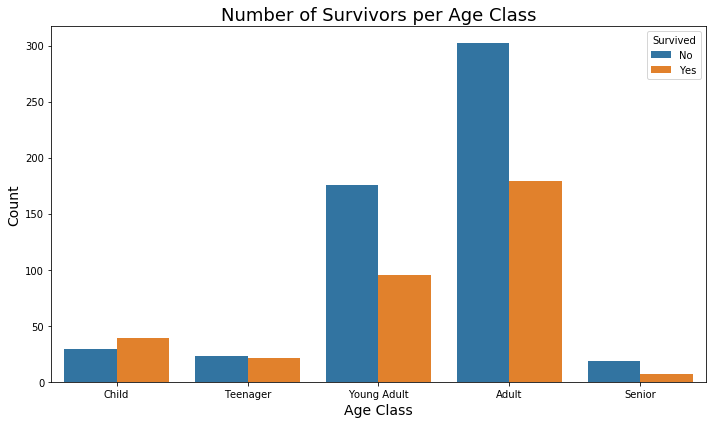

In [18]:
# Did children have a higher chance of survival?
# What is the distribution of age among survivors vs non-survivors?
# Are there specific age groups with higher survival rates?
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Classes', hue='Survived')
plt.title("Number of Survivors per Age Class", fontsize=18)
plt.xlabel("Age Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

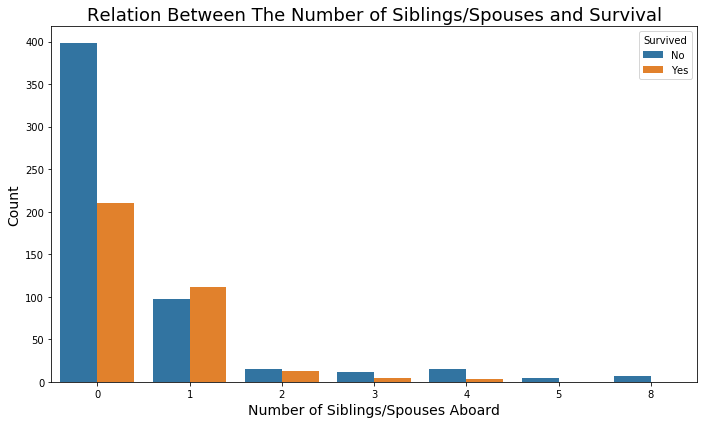

In [38]:
# Is there a relationship between the number of siblings/spouses (SibSp) and survival?

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title("Relation Between The Number of Siblings/Spouses and Survival", fontsize=18)
plt.xlabel("Number of Siblings/Spouses Aboard", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

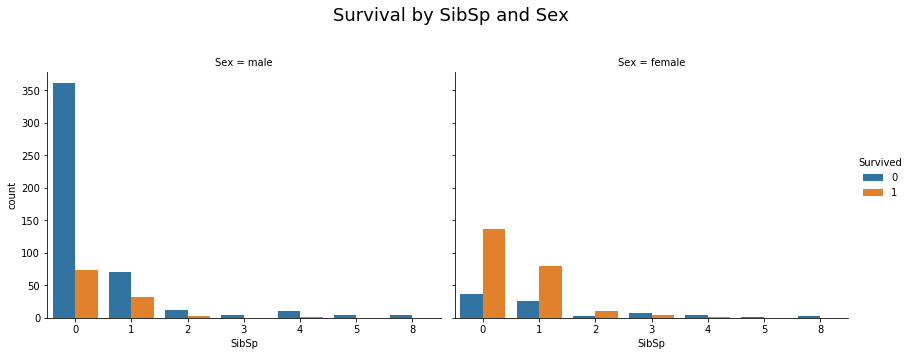

In [34]:
sns.catplot(
    data=df, kind="count",
    x="SibSp", hue="Survived",
    col="Sex",
    height=5, aspect=1.2,
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by SibSp and Sex", fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.show()

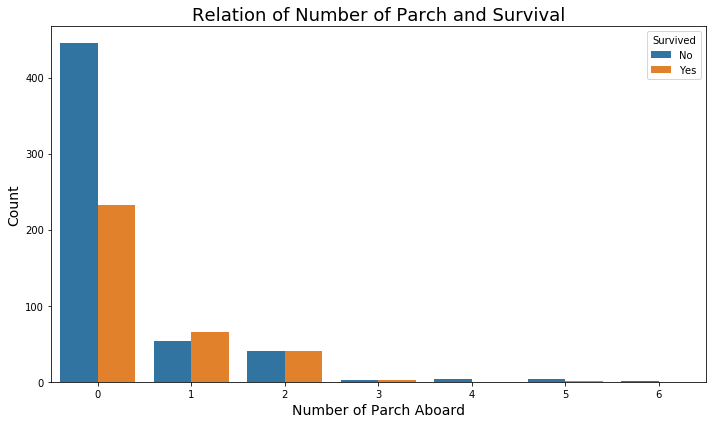

In [39]:
# Is there a relationship between the number of parents/children (Parch) and survival?

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title("Relation of Number of Parch and Survival", fontsize=18)
plt.xlabel("Number of Parch Aboard", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

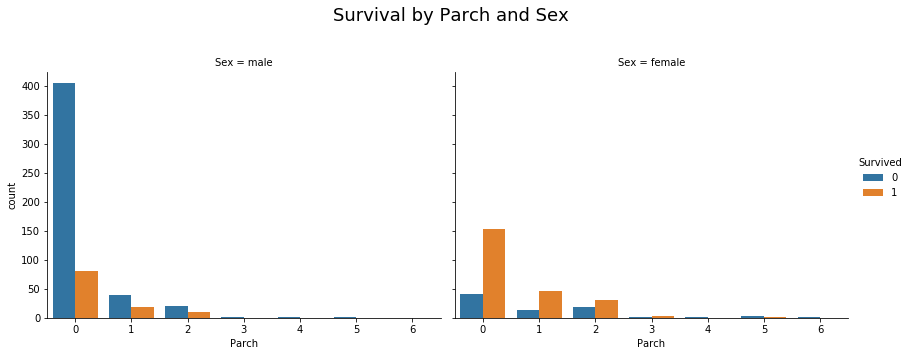

In [35]:
sns.catplot(
    data=df, kind="count",
    x="Parch", hue="Survived",
    col="Sex",
    height=5, aspect=1.2,
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Parch and Sex", fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.show()

In [43]:
df['IsAlone'] = df['Parch'] + df['SibSp'] == 0
df['IsAlone'] = np.where(df['IsAlone'] == True, 'Yes', 'No')

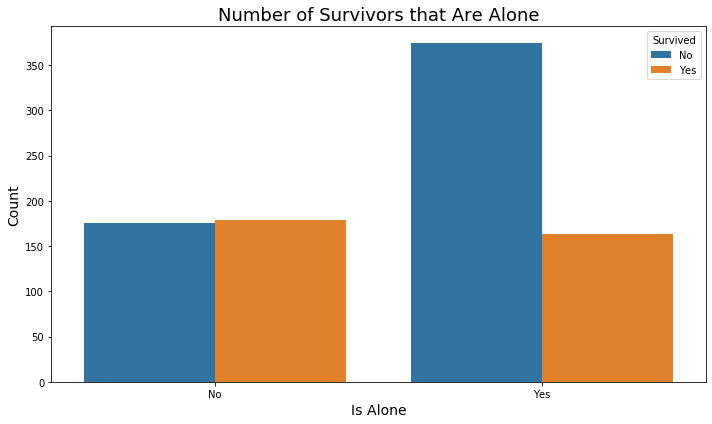

In [44]:
# Were people traveling alone less likely to survive?

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='IsAlone', hue='Survived')
plt.title("Number of Survivors that Are Alone", fontsize=18)
plt.xlabel("Is Alone", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

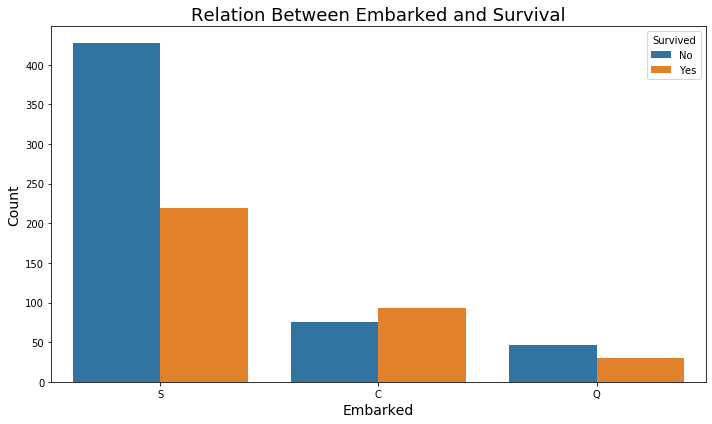

In [45]:
# Which embarkation port had the highest survival rate?

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Relation Between Embarked and Survival", fontsize=18)
plt.xlabel("Embarked", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

In [46]:
pd.crosstab(df['Embarked'], df['Pclass'], margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,129,164,353,646
All,216,184,491,891


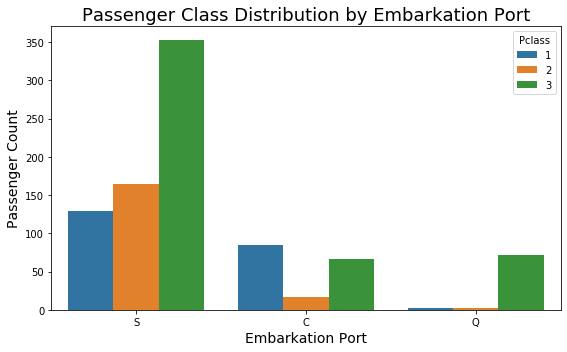

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.title("Passenger Class Distribution by Embarkation Port", fontsize=18)
plt.xlabel("Embarkation Port", fontsize=14)
plt.ylabel("Passenger Count", fontsize=14)
plt.legend(title="Pclass")
plt.tight_layout()
plt.show()

In [51]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Embarked'], df['Pclass'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}")

Chi² = 122.64, p-value = 0.0000


A chi-squared test was performed to assess the relationship between the embarkation port and passenger class. The result was statistically significant (Chi² = 122.64, p < 0.001), indicating a strong association between the two variables. This suggests that passengers from different ports were more likely to belong to specific ticket classes.

# Preparing for Modeling

In [105]:
# Making a copy of the dataset
data = df.copy()

In [106]:
data['Age_Classes'].fillna('Child', inplace=True)

In [107]:
data['Age_Classes'].unique()

['Young Adult', 'Adult', 'Child', 'Teenager', 'Senior']
Categories (5, object): ['Child' < 'Teenager' < 'Young Adult' < 'Adult' < 'Senior']

In [108]:
# Encoding Age_Classes
data['Age_Classes'] = data['Age_Classes'].map({'Child': 0, 'Teenager': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4})

In [109]:
# Encoding IsAlone
data['IsAlone'] = data['IsAlone'].map({'Yes': 1, 'No': 0})

In [110]:
# Encodinha Sex
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

In [111]:
embarked_dummies = pd.get_dummies(data['Embarked'])
data = pd.concat([data, embarked_dummies], axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Classes,IsAlone,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,2,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3,0,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,3,1,0,0,1


In [112]:
# Get titles
data['Title'] = data['Name'].str.split(', ').str[1].str.split('.').str[0]

In [113]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [114]:
common_titles = ['Mr', 'Mrs', 'Miss', 'Ms', 'Master', 'Mme', 'Mlle']
professional_titles = ['Dr', 'Rev']
military_titles = ['Col', 'Major', 'Capt']
royalty_titles = ['Sir', 'Lady', 'Don', 'the Countess', 'Jonkheer']

data['Title'] = data['Title'].replace(common_titles, 'Common')
data['Title'] = data['Title'].replace(professional_titles, 'Professional')
data['Title'] = data['Title'].replace(military_titles, "Military")
data['Title'] = data['Title'].replace(royalty_titles, 'Royal')

In [115]:
data['Title'].value_counts()

Common          868
Professional     13
Royal             5
Military          5
Name: Title, dtype: int64

In [116]:
title_dummies = pd.get_dummies(data['Title'], drop_first=True)
data = pd.concat([data, title_dummies], axis=1)

In [117]:
columns_to_drop = ['Name', 'Title', 'Embarked']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [118]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Classes,IsAlone,C,Q,S,Military,Professional,Royal
0,0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,0
1,1,1,0,38.0,1,0,71.2833,3,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,1,0,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,3,0,0,0,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,3,1,0,0,1,0,0,0


In [119]:
data.corr()['Survived']

Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.070324
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
IsAlone        -0.203367
C               0.168240
Q               0.003650
S              -0.149683
Military        0.002496
Professional   -0.038299
Royal           0.033391
Name: Survived, dtype: float64

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score

In [125]:
def plot_metrics(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    fpr, tpr, thresholds = roc_curve(y_true, y_preds)
    auc_score = roc_auc_score(y_true, y_preds)
    
    print("Stats:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    
    # Plotar
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    return {"Accuracy": accuracy,
           "Precision": precision,
           "Recall": recall,
           "F1-Score": f1,
           "AUC-Score": auc_score}
    

In [126]:
X = data.drop('Survived', axis=1)
y = data['Survived']

Stats:
Accuracy: 97.98%
Precision: 0.98
Recall: 0.96
F1-Score: 0.97


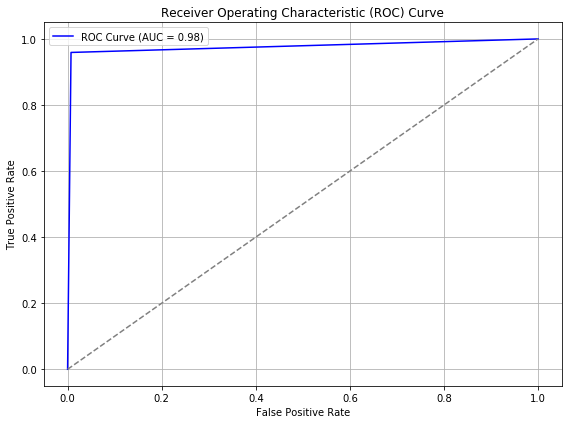

Stats:
Accuracy: 82.94%
Precision: 0.83
Recall: 0.75
F1-Score: 0.77


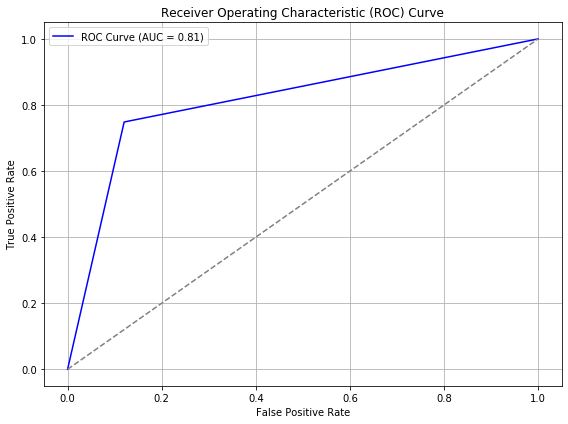

Stats:
Accuracy: 68.57%
Precision: 0.69
Recall: 0.31
F1-Score: 0.43


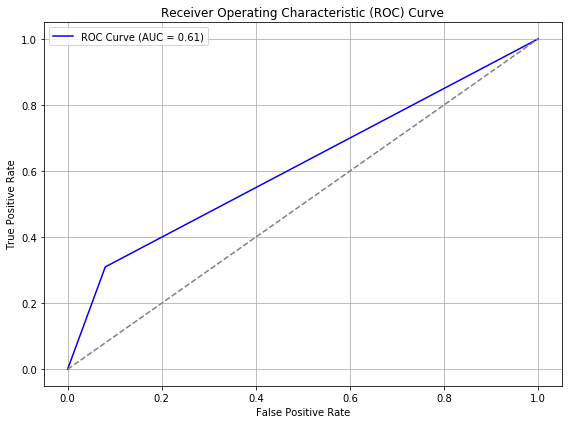

In [127]:
models = {"RandomForest": RandomForestClassifier(n_estimators=100),
         "KNN": KNeighborsClassifier(n_neighbors=3),
         "SVC": SVC()}

metrics = {}
for clf in models.keys():
    models[clf].fit(X, y)
    y_preds = models[clf].predict(X)
    metrics[clf] = plot_metrics(y, y_preds)

In [154]:
def prepare_data(data):
    columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
    data.drop(columns=columns_to_drop, axis=1, inplace=True)
    
    data['Fare'].fillna(fare_mean, inplace=True)
    
    data['Age'].fillna(age_mean, inplace=True)
    data['Embarked'].fillna(embarked_mode, inplace=True)
    
    data['Age'] = round(data['Age'])
    age_classes = [0, 1, 2, 3, 4]
    data['Age_Classes'] = pd.cut(data['Age'], bins=[-1, 12, 17, 29, 59, 130], labels=age_classes)
    data['Age_Classes'].fillna(0, inplace=True)
    
    data['IsAlone'] = (data['Parch'] + data['SibSp'] == 0).astype(int)
    data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
    
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data, embarked_dummies], axis=1)
    
    data['Title'] = data['Name'].str.split(', ').str[1].str.split('.').str[0]
    common_titles = ['Mr', 'Mrs', 'Miss', 'Ms', 'Master', 'Mme', 'Mlle', 'Dona']
    professional_titles = ['Dr', 'Rev']
    military_titles = ['Col', 'Major', 'Capt']
    royalty_titles = ['Sir', 'Lady', 'Don', 'the Countess', 'Jonkheer']
    data['Title'] = data['Title'].replace(common_titles, 'Common')
    data['Title'] = data['Title'].replace(professional_titles, 'Professional')
    data['Title'] = data['Title'].replace(military_titles, "Military")
    data['Title'] = data['Title'].replace(royalty_titles, 'Royal')
    valid_titles = ['Common', 'Professional', 'Military', 'Royal']
    data.loc[~data['Title'].isin(valid_titles), 'Title'] = 'Common'
    
    title_dummies = pd.get_dummies(data['Title'])
    for col in ['Military', 'Professional', 'Royal']:
        if col not in title_dummies:
            title_dummies[col] = 0
    title_dummies = title_dummies[['Military', 'Professional', 'Royal']]
    data = pd.concat([data, title_dummies], axis=1)
    
    columns_to_drop = ['Name', 'Title', 'Embarked']
    data.drop(columns=columns_to_drop, axis=1, inplace=True)
    
    return data


In [155]:
df_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')
df_test = pd.merge(df_test, y_test, how='inner', on='PassengerId')

In [156]:
df_test = prepare_data(df_test)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Age_Classes,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Military,Professional,Royal
0,3,1,34.0,0,0,7.8292,0,3,1,0,1,0,0,0,0
1,3,0,47.0,1,0,7.0000,1,3,0,0,0,1,0,0,0
2,2,1,62.0,0,0,9.6875,0,4,1,0,1,0,0,0,0
3,3,1,27.0,0,0,8.6625,0,2,1,0,0,1,0,0,0
4,3,0,22.0,1,1,12.2875,1,2,0,0,0,1,0,0,0


Stats:
Accuracy: 80.62%
Precision: 0.81
Recall: 0.74
F1-Score: 0.74


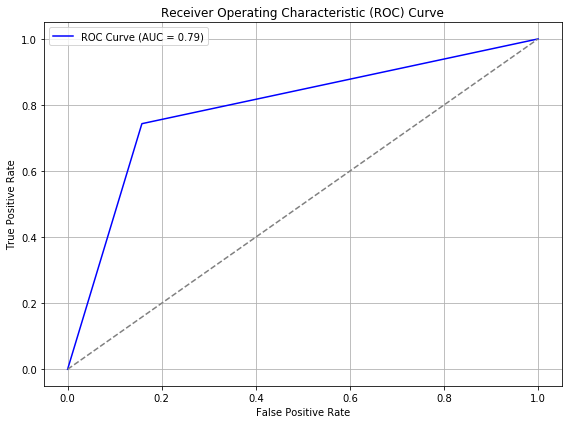

Stats:
Accuracy: 64.59%
Precision: 0.65
Recall: 0.51
F1-Score: 0.51


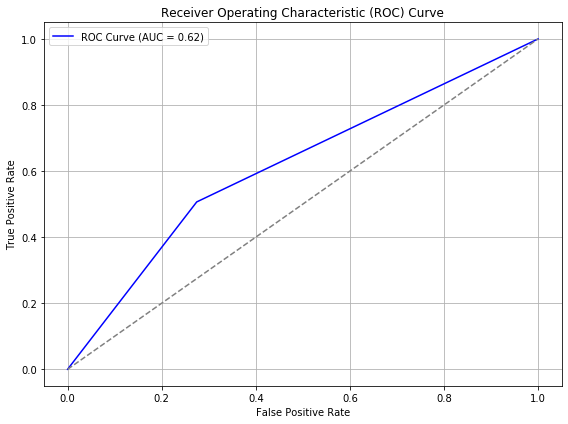

Stats:
Accuracy: 65.55%
Precision: 0.66
Recall: 0.28
F1-Score: 0.37


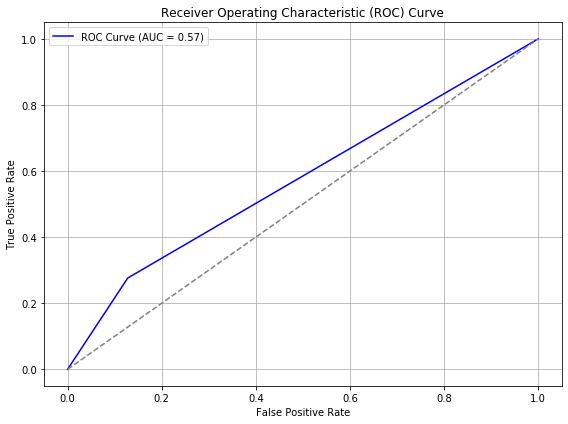

In [158]:
metrics = {}
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

for clf in models.keys():
    y_preds = models[clf].predict(X_test)
    metrics[clf] = plot_metrics(y_test, y_preds)

## Improvements on RandomForest

Metrics on Train Set: 
Stats:
Accuracy: 89.45%
Precision: 0.89
Recall: 0.79
F1-Score: 0.85


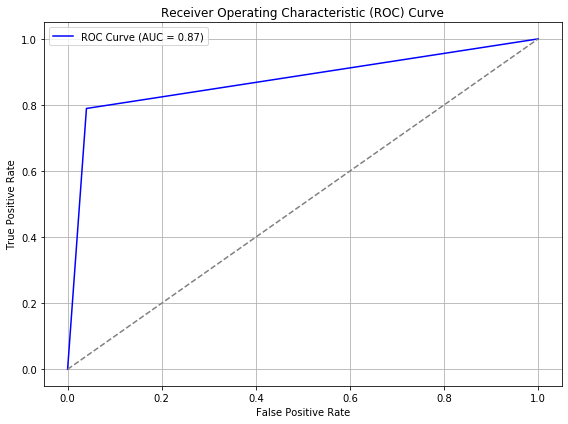

Metrics on Test Set:
Stats:
Accuracy: 89.00%
Precision: 0.89
Recall: 0.80
F1-Score: 0.84


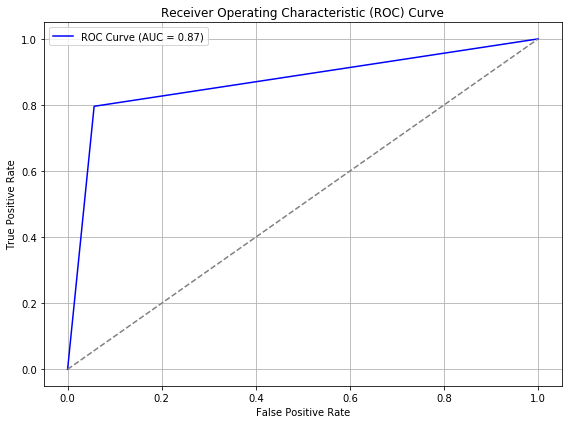

{'Accuracy': 0.8899521531100478,
 'Precision': 0.8897058823529411,
 'Recall': 0.7960526315789473,
 'F1-Score': 0.8402777777777778,
 'AUC-Score': 0.8698308270676692}

In [165]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [200, 400, 500, 1000, 1200, 1500],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None]
}

rf = RandomForestClassifier(n_jobs=-1)

clf = GridSearchCV(rf, grid, cv=5, scoring='accuracy', n_jobs=-1)

clf.fit(X, y)
y_preds = clf.predict(X)
print("Metrics on Train Set: ")
plot_metrics(y, y_preds)

y_preds = clf.predict(X_test)
print("Metrics on Test Set:")
plot_metrics(y_test, y_preds)

In [166]:
clf.best_params_

{'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}